# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#chaking the api_key
weather_api_key

'b94a3cd21aad294df7433f9e4dfc7bb7'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build thje url (test)
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "clyde river"
cURL = url + "appid=" + weather_api_key + "&q=" + city


In [5]:
# request ans convert it in jason 
response = requests.get(cURL).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1600062747,
 'id': 5924351,
 'main': {'feels_like': 270.53,
          'humidity': 83,
          'pressure': 1010,
          'temp': 274.15,
          'temp_max': 274.15,
          'temp_min': 274.15},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 776,
         'sunrise': 1600076634,
         'sunset': 1600125350,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 182, 'speed': 2.03}}


In [6]:
# make an empty list

lat = []
lon = []   
MTemp = []   
humidity = [] 
cloudinnes = []   
windspeed = []
name = []
country = [] 
date = []
# make the loop
for city in cities:
    #try and except
    try:
        # create the url for the loop and past the response to json
        cURL = url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(cURL).json()
        
        #append the data into the emty list 
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        MTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudinnes.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        name.append(response['name'])
        
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #close the try and except, 
        #print to know the loop status
        print(f"Processing Record " + city)    
    except KeyError:
        print("City not found. Skipping...")
        pass
    

Processing Record saskylakh
Processing Record ushuaia
Processing Record sorong
Processing Record traiguen
Processing Record poum
Processing Record thompson
City not found. Skipping...
Processing Record burnie
Processing Record mar del plata
Processing Record praia da vitoria
City not found. Skipping...
Processing Record ponta do sol
Processing Record faanui
Processing Record hermanus
Processing Record nikolskoye
Processing Record itoman
City not found. Skipping...
Processing Record dunedin
City not found. Skipping...
Processing Record yellowknife
Processing Record hobart
Processing Record sisimiut
Processing Record santander
Processing Record turukhansk
City not found. Skipping...
City not found. Skipping...
Processing Record airai
Processing Record hilo
City not found. Skipping...
City not found. Skipping...
Processing Record avarua
Processing Record bluff
Processing Record busselton
Processing Record pacific grove
Processing Record arraial do cabo
Processing Record ponnani
Processing

Processing Record lata
Processing Record kampong thum
Processing Record muborak
Processing Record muyinga
Processing Record nurota
Processing Record weyburn
Processing Record luanda
Processing Record misratah
Processing Record sarab
Processing Record nantucket
Processing Record tilichiki
Processing Record digby
Processing Record san joaquin
Processing Record najran
Processing Record kitui
Processing Record prince rupert
Processing Record faya
Processing Record samarai
Processing Record ahipara
Processing Record bathsheba
City not found. Skipping...
Processing Record charapan
Processing Record kruisfontein
Processing Record otradnoye
Processing Record champasak
Processing Record seidu
Processing Record kargasok
City not found. Skipping...
Processing Record garhi khairo
Processing Record mitsamiouli
Processing Record kieta
Processing Record mvangue
Processing Record oranjemund
Processing Record puerto escondido
Processing Record north bend
Processing Record vila do maio
City not found. S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Export the city data into a .csv.
d={"name" : name, "country": country, "lat": lat, "lon": lon, "MTemp": MTemp, "humidity": humidity, "cloudinnes": cloudinnes, "windspeed": windspeed, "date": date}
df = pd.DataFrame(d)
df.to_csv("countries_data.csv", index = False)
#Display the DataFrame
df2 = pd.read_csv("countries_data.csv")
df2.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Saskylakh,RU,71.92,114.08,285.94,63,100,2.40,1600062757
1,Ushuaia,AR,-54.80,-68.30,280.15,52,75,10.30,1600062758
2,Sorong,ID,-0.88,131.25,299.77,86,100,6.51,1600062759
3,Traiguén,CL,-38.25,-72.68,275.26,94,0,2.66,1600062760
4,Poum,NC,-20.23,164.02,296.21,79,11,4.68,1600062761


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# check if there are cities that have humidity > 100%.
# there are not.plt.
df2.loc[(df2["humidity"]>100)]

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
df2.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Saskylakh,RU,71.92,114.08,285.94,63,100,2.40,1600062757
1,Ushuaia,AR,-54.80,-68.30,280.15,52,75,10.30,1600062758
2,Sorong,ID,-0.88,131.25,299.77,86,100,6.51,1600062759
3,Traiguén,CL,-38.25,-72.68,275.26,94,0,2.66,1600062760
4,Poum,NC,-20.23,164.02,296.21,79,11,4.68,1600062761


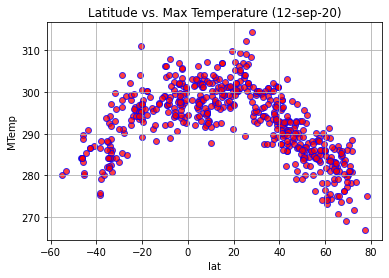

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a scatter plot of Latitude vs. Max Temperature
x=df2['lat']
y=df2['MTemp']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Max Temperature (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()
#Save the plotted figures as png
plt.savefig('Lat vs. Max Temp.png')

## Latitude vs. Humidity Plot

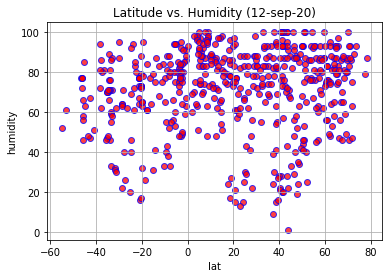

<Figure size 432x288 with 0 Axes>

In [14]:
x=df2['lat']
y=df2['humidity']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Humidity (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()
#Save the plotted figures as png
plt.savefig('Lat vs. Humidity.png')

## Latitude vs. Cloudiness Plot

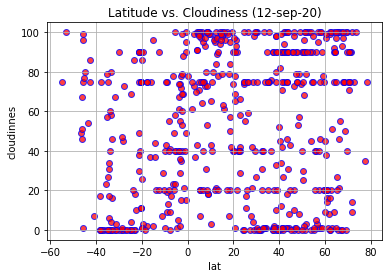

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a scatter plot of Latitude vs. Cloudiness
x=df2['lat']
y=df2['cloudinnes']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Cloudiness (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

#Save the plotted figures as png
plt.savefig('Lat vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

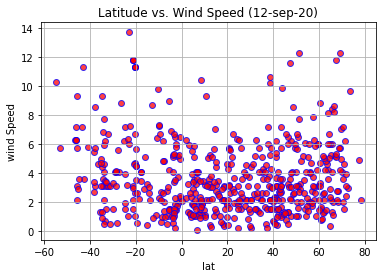

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a scatter plot of Latitude vs. Wind Speed
x=df2['lat']
y=df2['windspeed']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Wind Speed (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("wind Speed")
plt.grid()

plt.show()

#Save the plotted figures as png
plt.savefig('Lat vs. Wind Speed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = df2[df2['lat']>0]
Northern_Hemisphere.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Saskylakh,RU,71.92,114.08,285.94,63,100,2.40,1600062757
5,Thompson,CA,55.74,-97.86,276.15,93,40,2.00,1600062762
8,Praia da Vitória,PT,38.73,-27.07,294.26,94,75,5.27,1600062765
9,Ponta do Sol,PT,32.67,-17.10,294.15,77,20,1.50,1600062767
12,Nikolskoye,RU,59.70,30.79,285.93,87,20,6.00,1600062769


In [18]:
Southern_Hemisphere = df2[df2['lat']<0]
Southern_Hemisphere.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
1,Ushuaia,AR,-54.80,-68.30,280.15,52,75,10.30,1600062758
2,Sorong,ID,-0.88,131.25,299.77,86,100,6.51,1600062759
3,Traiguén,CL,-38.25,-72.68,275.26,94,0,2.66,1600062760
4,Poum,NC,-20.23,164.02,296.21,79,11,4.68,1600062761
6,Burnie,AU,-41.07,145.92,287.04,51,7,5.81,1600062763


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Max Temp vs. Latitude is -0.8


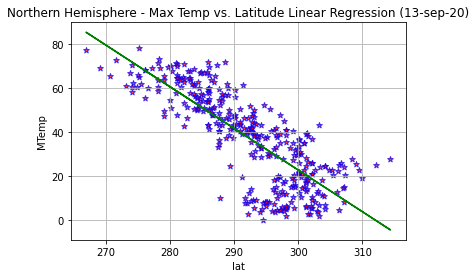

In [19]:

corr=round(sts.pearsonr(Northern_Hemisphere['MTemp'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Max Temp vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['MTemp'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['MTemp']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['MTemp'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['MTemp'], y_values,color="green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - Max Temp vs. Latitude is 0.73


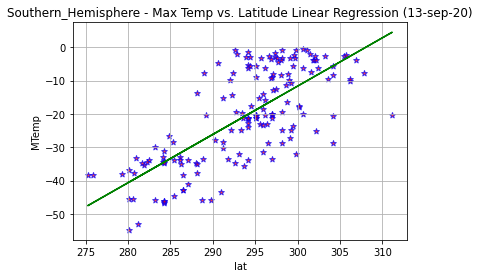

In [20]:
corr=round(sts.pearsonr(Southern_Hemisphere['MTemp'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - Max Temp vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['MTemp'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['MTemp']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['MTemp'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['MTemp'], y_values,color="green")
plt.title("Southern_Hemisphere - Max Temp vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Humidity (%) vs. Latitude is -0.05


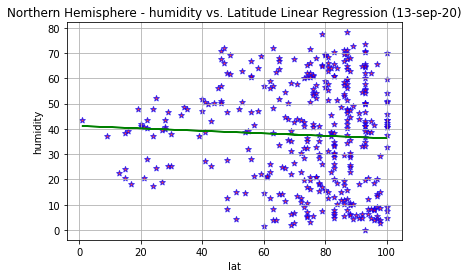

In [21]:
corr=round(sts.pearsonr(Northern_Hemisphere['humidity'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Humidity (%) vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['humidity'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['humidity']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['humidity'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['humidity'], y_values,color="green")
plt.title("Northern Hemisphere - humidity vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - humidity vs. Latitude is 0.18


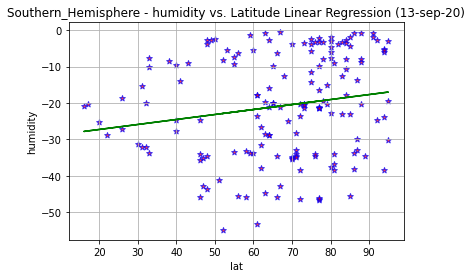

In [22]:
corr=round(sts.pearsonr(Southern_Hemisphere['humidity'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - humidity vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['humidity'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['humidity']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['humidity'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['humidity'], y_values,color="green")
plt.title("Southern_Hemisphere - humidity vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Cloudiness (%) vs. Latitude is -0.12


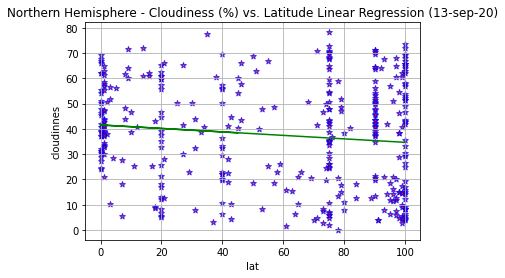

In [23]:
corr=round(sts.pearsonr(Northern_Hemisphere['cloudinnes'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Cloudiness (%) vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['cloudinnes'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['cloudinnes']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['cloudinnes'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['cloudinnes'], y_values,color="green")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - cloudinnes vs. Latitude is 0.07


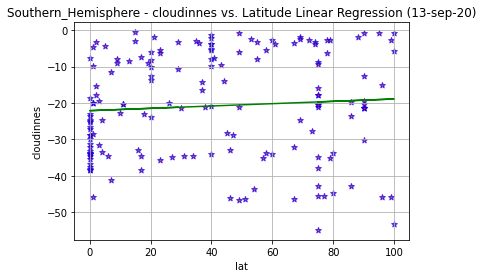

In [24]:
corr=round(sts.pearsonr(Southern_Hemisphere['cloudinnes'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - cloudinnes vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['cloudinnes'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['cloudinnes']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['cloudinnes'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['cloudinnes'], y_values,color="green")
plt.title("Southern_Hemisphere - cloudinnes vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear is 0.23


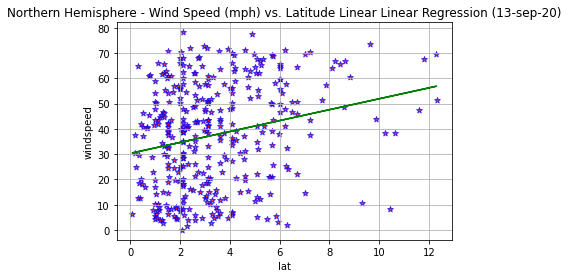

In [25]:
corr=round(sts.pearsonr(Northern_Hemisphere['windspeed'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear is {corr}")
model = sts.linregress(Northern_Hemisphere['windspeed'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['windspeed']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['windspeed'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['windspeed'], y_values,color="green")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("windspeed")
plt.grid()

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - windspeed vs. Latitude is -0.22


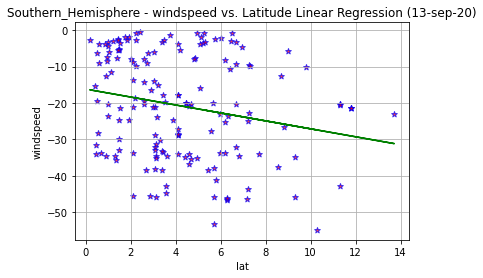

In [26]:
corr=round(sts.pearsonr(Southern_Hemisphere['windspeed'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - windspeed vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['windspeed'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['windspeed']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['windspeed'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['windspeed'], y_values,color="green")
plt.title("Southern_Hemisphere - windspeed vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("windspeed")
plt.grid()

plt.show()
